In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Global_Superstore2.csv', encoding='unicode_escape')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
data = df.copy(deep = True)

In [ ]:
data.shape

(51290, 24)

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
def df_info(df: pd.DataFrame):
    t = []
    for col in df.columns:
        k_unique = df[col].nunique()
        k_nan = df[col].isna().sum()
        k_zeros = (df[col] == 0).sum()
        d_type = df[col].dtype

        t.append([col, k_unique, k_nan, k_zeros, d_type])

    col_info = pd.DataFrame(t, columns=['columns', 'unique', 'NaN', 'zeros', 'd_type'])
    return col_info

In [ ]:
info = df_info(data)
info

,columns,unique,NaN,zeros,d_type
0,Row ID,51290,0,0,int64
1,Order ID,25035,0,0,object
2,Order Date,1430,0,0,object
3,Ship Date,1464,0,0,object
4,Ship Mode,4,0,0,object
5,Customer ID,1590,0,0,object
6,Customer Name,795,0,0,object
7,Segment,3,0,0,object
8,City,3636,0,0,object
9,State,1094,0,0,object


In [ ]:
info['nan_share'] = info['NaN'] / data.shape[0]
info['zero_share'] = info['zeros'] / data.shape[0]
info

,columns,unique,NaN,zeros,d_type,nan_share,zero_share
0,Row ID,51290,0,0,int64,0.000000,0.000000
1,Order ID,25035,0,0,object,0.000000,0.000000
2,Order Date,1430,0,0,object,0.000000,0.000000
3,Ship Date,1464,0,0,object,0.000000,0.000000
4,Ship Mode,4,0,0,object,0.000000,0.000000
5,Customer ID,1590,0,0,object,0.000000,0.000000
6,Customer Name,795,0,0,object,0.000000,0.000000
7,Segment,3,0,0,object,0.000000,0.000000
8,City,3636,0,0,object,0.000000,0.000000
9,State,1094,0,0,object,0.000000,0.000000


In [ ]:
descr = pd.DataFrame()
x = []
for col in data.select_dtypes(include=np.number).columns:
    x.append(np.median(data[col].dropna()))

pd.DataFrame(zip(data.select_dtypes(include=np.number).columns, x), columns=['Column', 'Median'])

,Column,Median
0,Row ID,25645.500
1,Postal Code,56430.500
2,Sales,85.053
3,Quantity,3.000
4,Discount,0.000
5,Profit,9.240
6,Shipping Cost,7.790


In [ ]:
data.drop('Postal Code', axis = 1, inplace = True)
data.shape

(51290, 23)

In [ ]:
data["Ship Date"]

0        31-07-2012
1        07-02-2013
2        18-10-2013
3        30-01-2013
4        06-11-2013
            ...    
51285    19-06-2014
51286    24-06-2014
51287    02-12-2013
51288    22-02-2012
51289    26-05-2012
Name: Ship Date, Length: 51290, dtype: object

In [ ]:
data["Order Date"]=pd.to_datetime(df["Order Date"])
data["Ship Date"]=pd.to_datetime(df["Ship Date"])


<ipython-input-13-3717314fff50>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Order Date"]=pd.to_datetime(df["Order Date"])
<ipython-input-13-3717314fff50>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Ship Date"]=pd.to_datetime(df["Ship Date"])


In [ ]:
data["order year"]=data["Order Date"].dt.year
data["order_month"]=data["Order Date"].dt.month
data["ship year"]=data["Ship Date"].dt.year
data["ship_month"]=data["Ship Date"].dt.month


In [ ]:
data["unit_price"]=data["Sales"]/data["Quantity"]

In [ ]:
data['Regular_price'] = data['unit_price']/(1.0-data['Discount'])

In [ ]:
num_features = ['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'unit_price', 'Regular_price']
cat_features = [item for item in data.columns if item not in num_features]

In [ ]:
data[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570
unit_price,51290.0,71.657487,113.581515,0.336,11.799900,29.400,82.1600,3773.080
Regular_price,51290.0,85.121957,136.272759,0.990,14.190000,35.060,103.5900,7546.160


<Axes: >

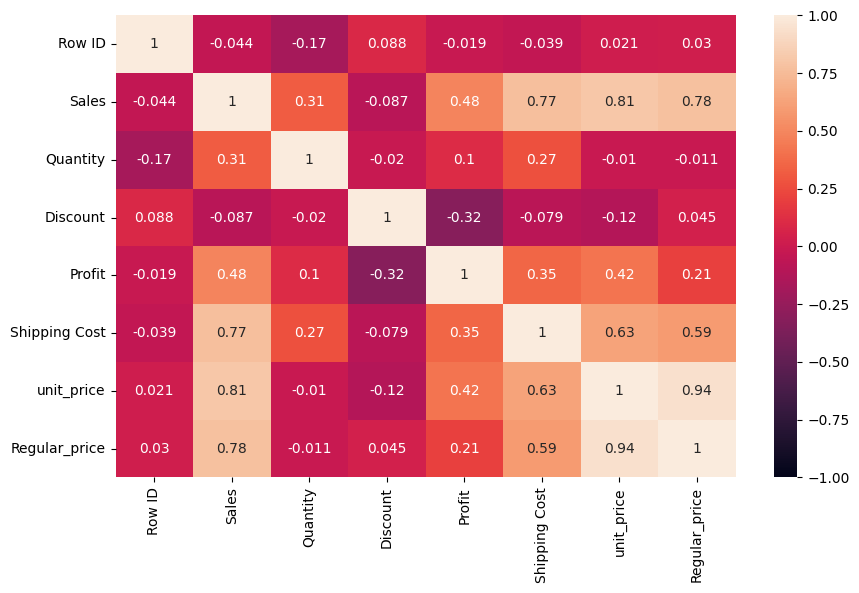

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=data[num_features].corr(),
            vmin=-1,
            vmax=1,
            annot=True)

In [ ]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,order year,order_month,ship year,ship_month,unit_price,Regular_price
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,0.0,762.1845,933.57,Critical,2012,7,2012,7,329.950,329.95
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,923.63,Critical,2013,2,2013,2,412.155,457.95
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,915.49,Medium,2013,10,2013,10,575.019,638.91
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,910.16,Medium,2013,1,2013,1,578.502,642.78
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,0.0,311.5200,903.04,Critical,2013,11,2013,11,354.120,354.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,0.0,4.5000,0.01,Medium,2014,6,2014,6,13.020,13.02
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,0.8,-1.1100,0.01,Medium,2014,6,2014,6,0.444,2.22
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,0.0,11.2308,0.01,High,2013,12,2013,12,7.640,7.64
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,0.0,2.4000,0.00,Medium,2012,2,2012,2,6.720,6.72


In [ ]:
data_back = data.copy(deep=True)
data.drop('Order ID', axis = 1, inplace = True)

In [ ]:
add_data1 = data.groupby('order year')[['Sales',	'Quantity',	'Discount',	'Profit',	'Shipping Cost',	'unit_price']]

In [ ]:
add_data1

In [ ]:
add_data1.mean().round(2)

,Sales,Quantity,Discount,Profit,Shipping Cost,unit_price
order year,,,,,,
2011,251.11,3.49,0.15,27.67,27.15,71.81
2012,244.25,3.48,0.14,28.04,25.86,71.51
2013,246.81,3.49,0.14,29.49,26.42,70.85
2014,245.27,3.46,0.14,28.76,26.27,72.31


In [ ]:
add_data1.sum().round(2)

,Sales,Quantity,Discount,Profit,Shipping Cost,unit_price
order year,,,,,,
2011,2259450.90,31443,1333.39,248940.81,244271.08,646166.82
2012,2677438.69,38111,1548.77,307415.28,283491.89,783859.81
2013,3405746.45,48136,1935.52,406935.23,364549.95,977674.33
2014,4299865.87,60622,2512.04,504165.97,460507.77,1267611.55


In [ ]:
add_data2 = data.groupby(['order_month'])[['Sales',	'Quantity',	'Discount',	'Profit',	'Shipping Cost',	'unit_price']]

In [ ]:
add_data2.mean().round(2)

,Sales,Quantity,Discount,Profit,Shipping Cost,unit_price
order_month,,,,,,
1,259.77,3.40,0.14,28.29,27.23,75.21
2,250.80,3.36,0.14,32.72,26.99,73.53
3,253.87,3.45,0.14,31.00,25.49,73.22
4,228.51,3.45,0.15,24.05,24.58,67.14
5,241.26,3.48,0.14,27.89,26.81,70.01
6,238.18,3.40,0.15,27.59,25.64,71.16
7,236.70,3.47,0.15,24.66,26.30,69.32
8,254.79,3.47,0.13,29.90,26.88,73.96
9,240.57,3.44,0.14,28.53,25.05,71.02


In [ ]:
add_data2.sum().round(2)

,Sales,Quantity,Discount,Profit,Shipping Cost,unit_price
order_month,,,,,,
1,675133.67,8843,362.58,73535.38,70758.95,195479.97
2,543739.38,7281,304.17,70932.20,58512.68,159414.05
3,770500.94,10481,432.29,94087.52,77374.03,222217.87
4,698561.21,10552,454.15,73513.63,75128.60,205248.39
5,904012.34,13042,538.73,104509.78,100442.96,262321.39
6,1269716.75,18119,792.92,147079.42,136677.59,379335.30
7,749381.84,10984,473.65,78070.09,83262.72,219479.29
8,1293833.17,17611,677.94,151854.11,136472.62,375580.77
9,1437380.11,20542,819.52,170438.18,149662.54,424319.32


In [ ]:
add_data3 = data.groupby(['Market'])

In [ ]:
add_data3.mean().round(2)

<ipython-input-45-4cb8450e8a6e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  add_data3.mean().round(2)


,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,order year,order_month,unit_price,Regular_price
Market,,,,,,,,,,
APAC,25748.26,566.26,4.36,0.12,72.65,63.57,2012.77,7.07,143.63,166.26
Africa,46287.32,423.83,3.21,0.07,64.44,50.82,2012.82,6.93,169.99,188.38
Canada,46324.86,389.13,2.95,0.00,106.62,46.67,2012.80,6.30,164.51,164.51
EMEA,46322.56,398.55,3.32,0.12,35.65,46.24,2012.84,6.90,159.90,187.36
EU,15324.15,499.46,4.42,0.10,63.88,55.22,2012.80,7.11,126.68,146.15
LATAM,5104.01,425.87,4.44,0.12,45.80,48.80,2012.78,7.41,108.03,126.50
US,36279.39,564.91,4.39,0.14,67.81,60.79,2012.71,7.24,142.49,176.42


In [ ]:
add_data3.sum().round(2)

<ipython-input-46-e0f26a5c33d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  add_data3.sum().round(2)


,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,order year,order_month,unit_price,Regular_price
Market,,,,,,,,,,
APAC,147614766,3246353.28,24987.0,690.16,416485.42,364454.77,11539196,40528,823430.81,953182.35
Africa,70819607,648460.74,4913.0,104.40,98587.14,77750.22,3079621,10600,260089.10,288219.36
Canada,6439156,54089.49,410.0,0.00,14819.55,6487.04,279779,876,22867.17,22867.17
EMEA,77266028,664775.24,5544.0,194.40,59461.55,77120.69,3357421,11511,266711.97,312511.50
EU,79946068,2605706.60,23069.0,517.60,333241.88,288108.36,10500791,37093,660889.83,762473.01
LATAM,22044205,1839319.86,19186.0,505.20,197813.10,210750.90,8693192,31983,466572.52,546338.30
US,130496948,2031996.69,15802.0,500.11,243911.61,218679.01,7239706,26045,512522.02,634576.40


In [ ]:
add_data4 = data.groupby(['Sub-Category'])

In [ ]:
add_data4.sum().round(2)

<ipython-input-48-f7d65ca2170f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  add_data4.sum().round(2)


,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,order year,order_month,unit_price,Regular_price
Sub-Category,,,,,,,,,,
Accessories,41860407,644116.61,7493.0,147.89,122085.08,76697.15,3451965,12276,163860.48,180592.21
Appliances,30073554,964490.05,4655.0,132.73,141046.43,105742.00,2461602,8650,276079.69,315716.85
Art,27651839,200522.39,6142.0,71.83,38545.11,27792.25,2417338,8505,41960.20,44772.99
Binders,24915276,293338.35,5115.0,96.56,53552.35,33596.58,1992618,7181,71263.40,95068.58
Bookcases,48078314,1421888.16,7802.0,293.31,166126.35,153796.32,4335550,15787,407237.78,471615.23
Chairs,60311968,1404838.45,10439.0,358.01,144369.09,159265.41,5176862,18329,376742.54,441361.09
Copiers,42821370,1466897.98,7076.0,203.76,260196.01,158044.42,4033682,14295,419335.61,469397.11
Envelopes,11401594,81045.27,2811.0,39.02,18180.90,11323.02,1056668,3680,16331.58,17601.96
Fasteners,3597418,14204.71,1073.0,8.77,2887.05,2640.38,318018,1068,2128.22,2257.11


In [ ]:
add_data4.mean().round(2)

<ipython-input-72-c3a2dbbd9084>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  add_data4.mean().round(2)


,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,order year,order_month,ship year,ship_month,unit_price,Regular_price
Sub-Category,,,,,,,,,,,,
Accessories,25799.32,243.65,3.56,0.12,42.15,27.16,2012.77,7.18,2012.79,7.13,68.65,78.02
Appliances,26639.12,576.11,3.46,0.14,80.73,61.71,2012.75,7.09,2012.76,7.04,169.24,196.35
Art,27586.60,76.20,3.34,0.12,11.87,8.46,2012.78,7.08,2012.80,7.15,23.04,26.33
Binders,27411.67,75.08,3.48,0.18,11.78,7.83,2012.79,7.15,2012.81,7.15,21.59,28.08
Bookcases,22741.76,608.28,3.45,0.15,67.16,64.49,2012.79,7.32,2012.82,7.21,178.87,210.36
Chairs,23271.76,437.30,3.59,0.16,40.88,47.82,2012.78,7.15,2012.79,7.13,123.95,147.62
Copiers,21793.43,679.01,3.35,0.12,116.31,71.75,2012.81,7.14,2012.82,7.11,199.92,227.24
Envelopes,23089.00,70.19,3.44,0.13,12.16,7.62,2012.79,7.08,2012.81,7.05,20.45,23.72
Fasteners,23502.89,34.40,3.47,0.14,4.76,3.74,2012.79,7.09,2012.81,7.07,10.08,11.82


In [ ]:
add_data5 = data.groupby(['Customer ID'])[['Sales',	'Quantity',	'Discount',	'Profit',	'Shipping Cost',	'unit_price']]

In [ ]:
add_data5.mean().round(2)

,Sales,Quantity,Discount,Profit,Shipping Cost,unit_price
Customer ID,,,,,,
AA-10315,327.32,3.45,0.10,10.66,29.43,97.89
AA-10375,140.10,3.31,0.17,16.13,21.52,48.33
AA-10480,465.67,3.95,0.08,39.91,42.99,112.33
AA-10645,210.19,3.66,0.13,41.80,24.00,52.08
AA-315,280.41,2.50,0.22,66.95,26.98,114.46
...,...,...,...,...,...,...
YS-21880,346.36,3.65,0.07,57.25,30.00,91.14
ZC-11910,7.17,1.00,0.70,-15.57,0.85,7.17
ZC-21910,338.96,3.96,0.22,5.39,36.64,74.57


In [ ]:
data.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'order year', 'order_month', 'ship year',
       'ship_month', 'unit_price', 'Regular_price'],
      dtype='object')

In [ ]:
data.to_csv('globa_superstore.csv')

In [ ]:
data

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Discount,Profit,Shipping Cost,Order Priority,order year,order_month,ship year,ship_month,unit_price,Regular_price
0,32298,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,0.0,762.1845,933.57,Critical,2012,7,2012,7,329.950,329.95
1,26341,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,0.1,-288.7650,923.63,Critical,2013,2,2013,2,412.155,457.95
2,25330,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,0.1,919.9710,915.49,Medium,2013,10,2013,10,575.019,638.91
3,13524,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,0.1,-96.5400,910.16,Medium,2013,1,2013,1,578.502,642.78
4,47221,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,0.0,311.5200,903.04,Critical,2013,11,2013,11,354.120,354.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,...,0.0,4.5000,0.01,Medium,2014,6,2014,6,13.020,13.02
51286,35398,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,...,0.8,-1.1100,0.01,Medium,2014,6,2014,6,0.444,2.22
51287,40470,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,...,0.0,11.2308,0.01,High,2013,12,2013,12,7.640,7.64
51288,9596,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,...,0.0,2.4000,0.00,Medium,2012,2,2012,2,6.720,6.72


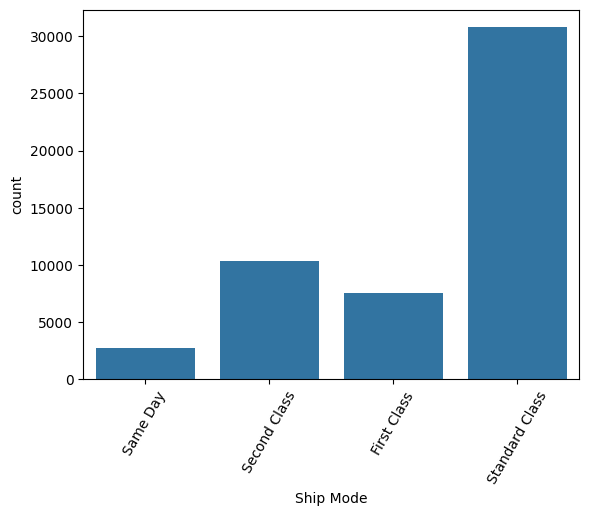

                Ship Mode      Ratio
Standard Class      30775  60.001950
Second Class        10309  20.099435
First Class          7505  14.632482
Same Day             2701   5.266134
##########################################


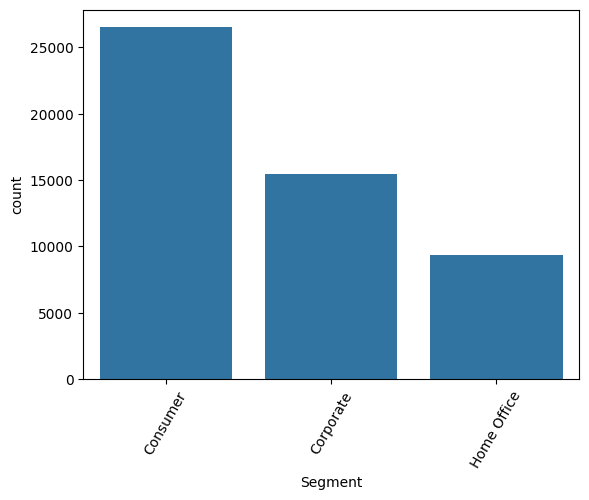

             Segment      Ratio
Consumer       26518  51.702086
Corporate      15429  30.081887
Home Office     9343  18.216027
##########################################


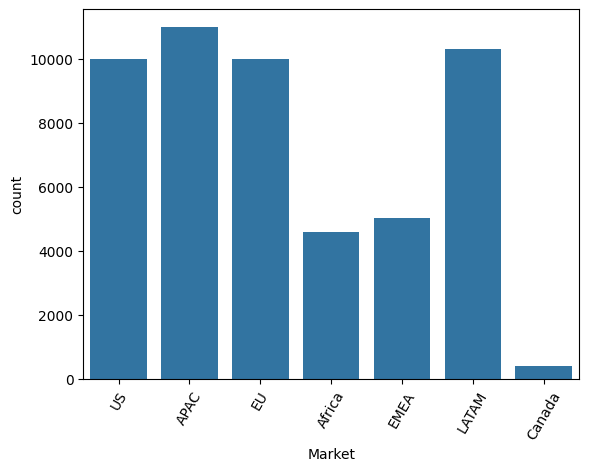

        Market      Ratio
APAC     11002  21.450575
LATAM    10294  20.070189
EU       10000  19.496978
US        9994  19.485280
EMEA      5029   9.805030
Africa    4587   8.943264
Canada     384   0.748684
##########################################


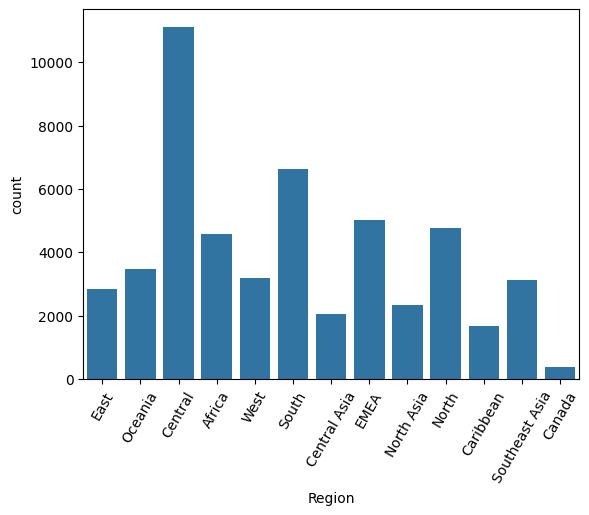

                Region      Ratio
Central          11117  21.674790
South             6645  12.955742
EMEA              5029   9.805030
North             4785   9.329304
Africa            4587   8.943264
Oceania           3487   6.798596
West              3203   6.244882
Southeast Asia    3129   6.100604
East              2848   5.552739
North Asia        2338   4.558393
Central Asia      2048   3.992981
Caribbean         1690   3.294989
Canada             384   0.748684
##########################################


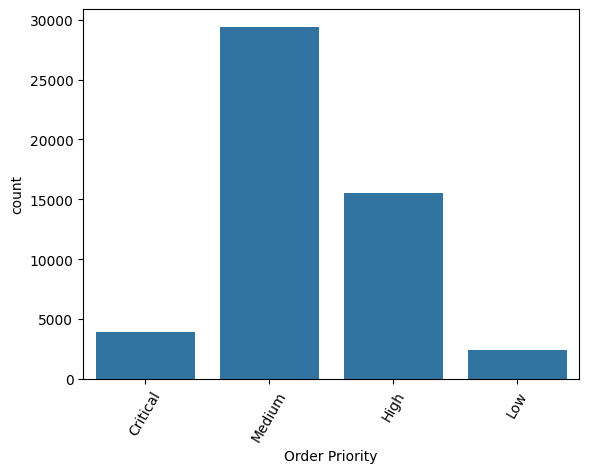

          Order Priority      Ratio
Medium             29433  57.385455
High               15501  30.222266
Critical            3932   7.666212
Low                 2424   4.726067
##########################################


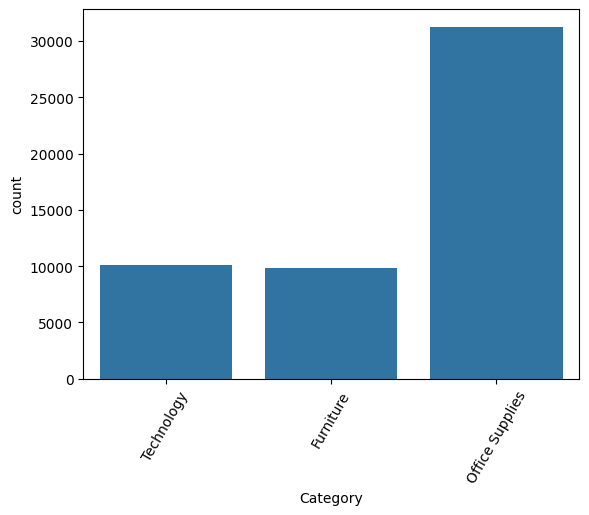

                 Category      Ratio
Office Supplies     31273  60.972899
Technology          10141  19.771885
Furniture            9876  19.255215
##########################################


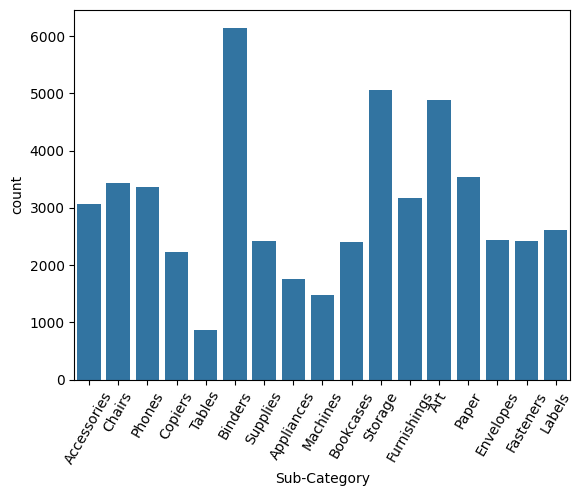

             Sub-Category      Ratio
Binders              6152  11.994541
Storage              5059   9.863521
Art                  4883   9.520374
Paper                3538   6.898031
Chairs               3434   6.695262
Phones               3357   6.545136
Furnishings          3170   6.180542
Accessories          3075   5.995321
Labels               2606   5.080912
Envelopes            2435   4.747514
Supplies             2425   4.728017
Fasteners            2420   4.718269
Bookcases            2411   4.700721
Copiers              2223   4.334178
Appliances           1755   3.421720
Machines             1486   2.897251
Tables                861   1.678690
##########################################


In [ ]:
def cat_summary(f,col,plot=False):

    if plot:
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=60)
        plt.show()
    print(pd.DataFrame({col:df[col].value_counts(),
                       "Ratio":100*df[col].value_counts()/len(df)}))
    print("##########################################")

features = ['Ship Mode', 'Segment', 'Market', 'Region', 'Order Priority', 'Category', 'Sub-Category']
for i in features:
    cat_summary(data,i,plot=True)

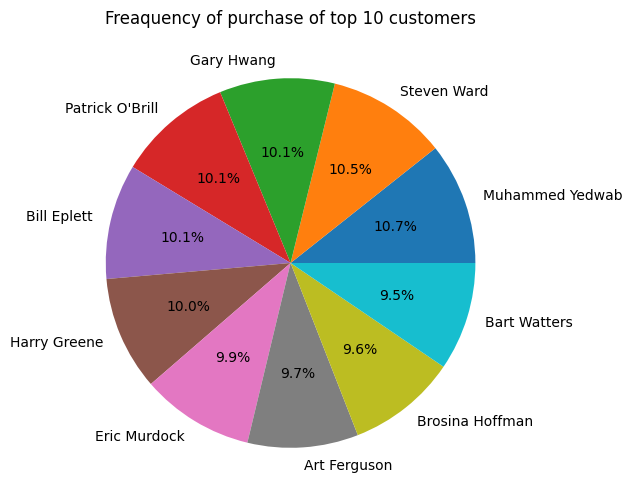

In [ ]:
a=data["Customer Name"].value_counts().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,6))
plt.pie(a.head(10),labels=a.head(10).index,autopct="%1.1f%%")
plt.title("Freaquency of purchase of top 10 customers")
plt.show()

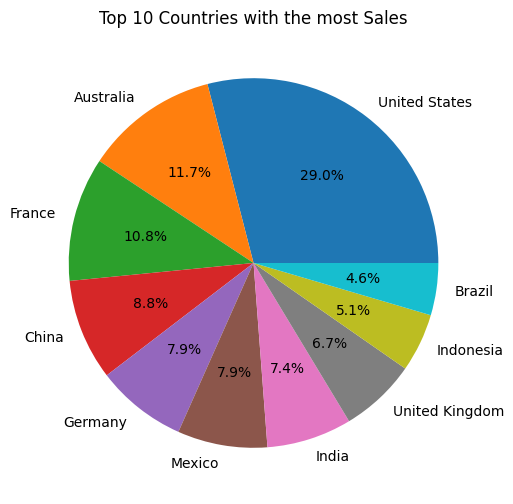

,Sales,Ratio
Country,,
United States,2297200.86,18.17
Australia,925235.85,7.32
France,858931.08,6.79
China,700562.02,5.54
Germany,628840.03,4.97
Mexico,622590.62,4.92
India,589650.10,4.66
United Kingdom,528576.30,4.18
Indonesia,404887.50,3.20


In [ ]:
b=data.groupby("Country").agg({"Sales":"sum"}).sort_values("Sales",ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.pie(b["Sales"],labels=b.index,autopct="%1.1f%%")
plt.title("Top 10 Countries with the most Sales")
plt.show()

a=data.groupby("Country").agg({"Sales":"sum"}).sort_values("Sales",ascending=False).round(2).head(10)
b=(100*a/data["Sales"].sum()).round(2)
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]
c

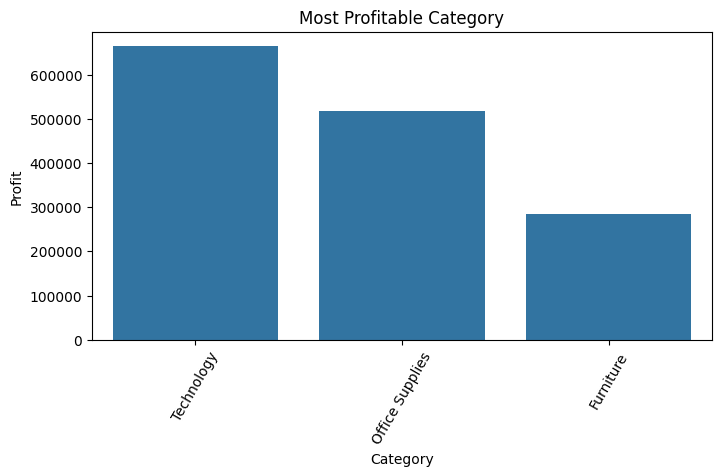

,total Profit,Ratio of Profit,count of category,Ratio of category
Technology,663778.73,45.23,10141,19.77
Office Supplies,518473.83,35.33,31273,60.97
Furniture,285204.72,19.44,9876,19.26


In [ ]:
# most profitable category

a=data.groupby("Category").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=a.index,y=a["Profit"])
plt.xticks(rotation=60)
plt.title("Most Profitable Category")
plt.show()

# value counts of category


a=data.groupby("Category").agg({"Profit":"sum"}).sort_values("Profit",ascending=False).round(2)
a1=data["Category"].value_counts()
b=(100*a/a.sum()).round(2)
b1=(100*a1/a1.sum()).round(2)
c=pd.concat([a,b,a1,b1],axis=1)
c.columns=["total Profit","Ratio of Profit","count of category","Ratio of category"]
c

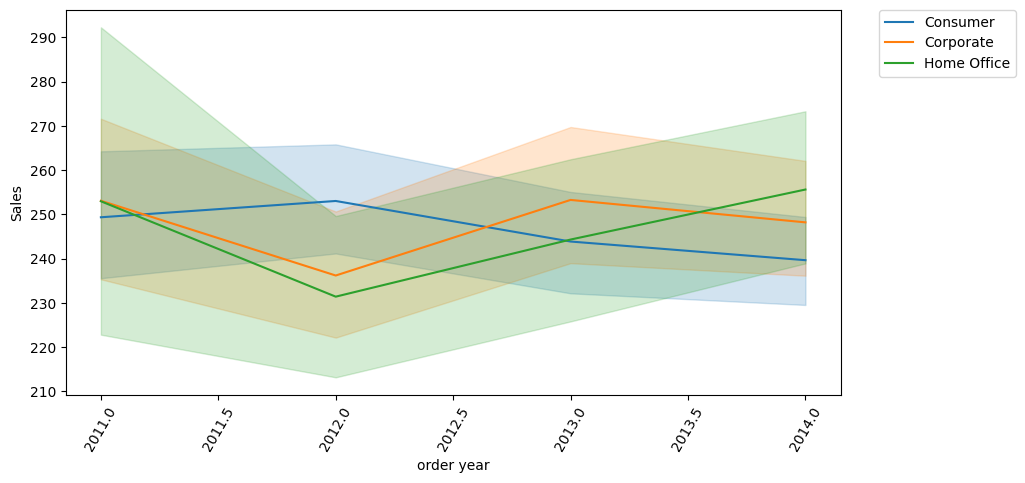

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x="order year",y="Sales",hue="Segment",data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)
plt.show()

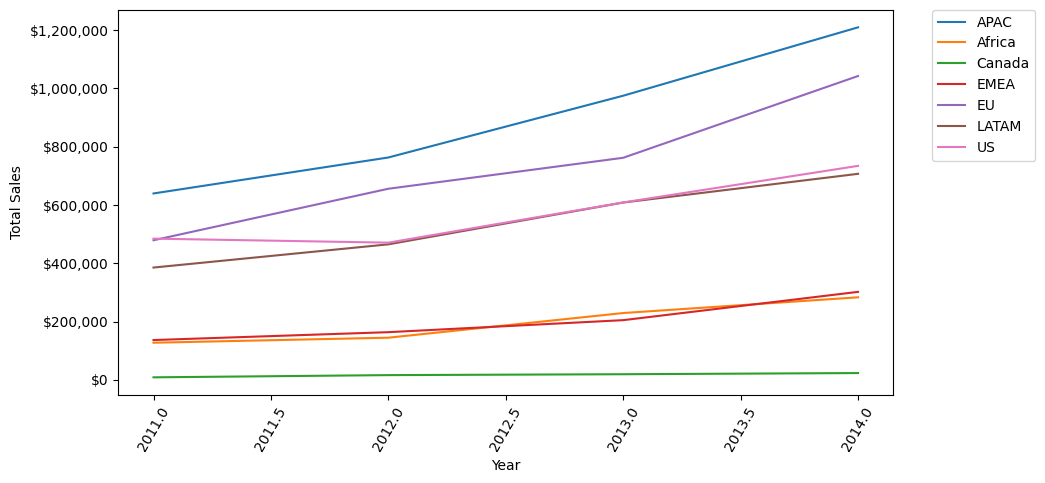

Sales  Ratio
order year Market                   
2011       APAC     639245.26  28.29
           Africa   127187.27   5.63
           Canada     8509.11   0.38
           EMEA     136420.32   6.04
           EU       478743.28  21.19
           LATAM    385098.16  17.04
           US       484247.50  21.43
2012       APAC     762719.33  28.49
           Africa   144480.70   5.40
           Canada    16096.80   0.60
           EMEA     163414.36   6.10
           EU       655461.69  24.48
           LATAM    464733.30  17.36
           US       470532.51  17.57
2013       APAC     974580.86  28.62
           Africa   229068.79   6.73
           Canada    19161.15   0.56
           EMEA     204640.68   6.01
           EU       761680.36  22.36
           LATAM    608140.77  17.86
           US       608473.83  17.87
2014       APAC    1209198.69  28.12
           Africa   283036.44   6.58
           Canada    23161.11   0.54
           EMEA     301685.94   7.02
           EU      1042203.73  24.24
           LATAM    706632.94  16.43
           US       733947.02  17.07

In [ ]:
# relation between market and sales:

from matplotlib import ticker as mtick

a=(data.groupby(["order year","Market"])["Sales"].sum()).round(2)
a=pd.DataFrame(a)
b=(100*a/a.groupby(level=0).sum()).round(2)
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]


plt.figure(figsize=(10,5))
sns.lineplot(data=c,x=c.index.get_level_values(0),y="Sales",hue="Market")
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# changing y axis to thousands
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

c


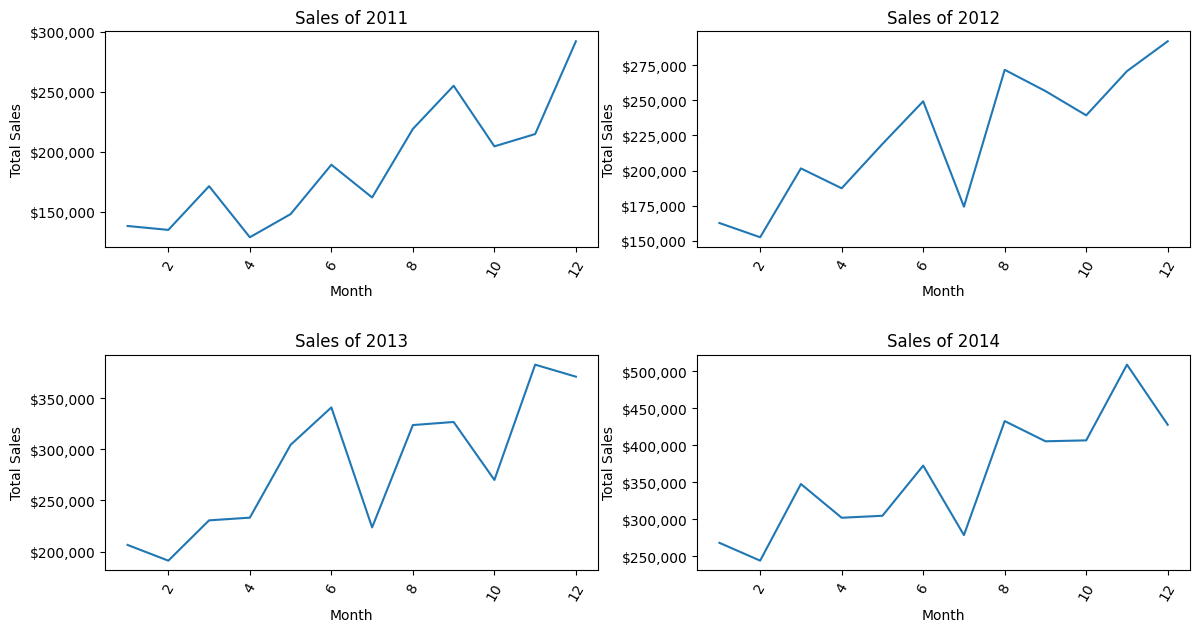

In [ ]:
# relation between each year and sales:

a=data.groupby(["order year","order_month"])["Sales"].sum()

b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]


plt.figure(figsize=(14,7))

for i in range(2011,2015):
    plt.subplot(2,2,i-2010)
    plt.subplots_adjust(hspace = 0.5)
    sns.lineplot(data=c.loc[i],x=c.loc[i].index.get_level_values(0),y="Sales")
    plt.xticks(rotation=60)
    # changing y axis to thousands and $ sign
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    plt.gca().yaxis.set_major_formatter(tick)
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.title("Sales of {}".format(i))

plt.show()

In [ ]:
a=(data.groupby(["Country","order year","order_month"])["Sales"].sum()).round(2)
b=(100*a/a.sum()).round(2)
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]
c.head(10)

Sales  Ratio
Country     order year order_month                
Afghanistan 2011       1             219.78   0.00
                       5            1159.95   0.01
                       7             177.93   0.00
                       8              83.40   0.00
                       12             88.35   0.00
            2012       1             447.42   0.00
                       4            4626.15   0.04
                       5            1216.47   0.01
                       9             950.52   0.01
                       12           1831.26   0.01

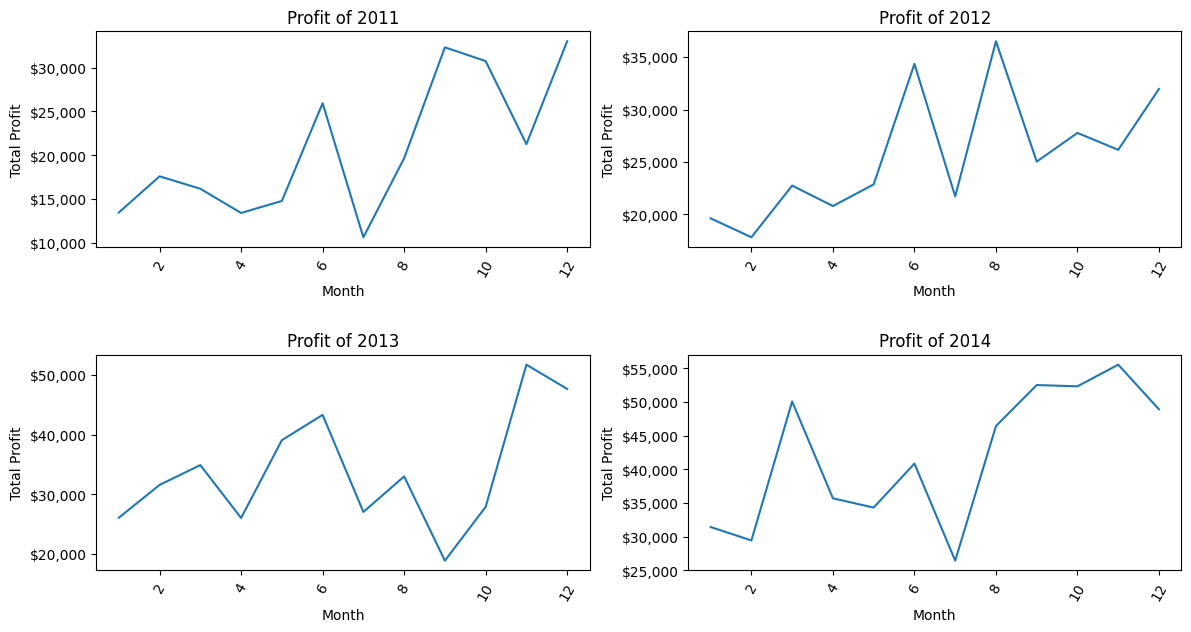

In [ ]:
# relation between each year and profit:

a=data.groupby(["order year","order_month"])["Profit"].sum()
b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Profit","Ratio"]


plt.figure(figsize=(14,7))
for i in range(2011,2015):
    plt.subplot(2,2,i-2010)
    plt.subplots_adjust(hspace = 0.5)
    sns.lineplot(data=c.loc[i],x=c.loc[i].index.get_level_values(0),y="Profit")
    plt.xticks(rotation=60)
    # changing y axis to thousands and $ sign
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    plt.gca().yaxis.set_major_formatter(tick)
    plt.xlabel("Month")
    plt.ylabel("Total Profit")
    plt.title("Profit of {}".format(i))

plt.show()

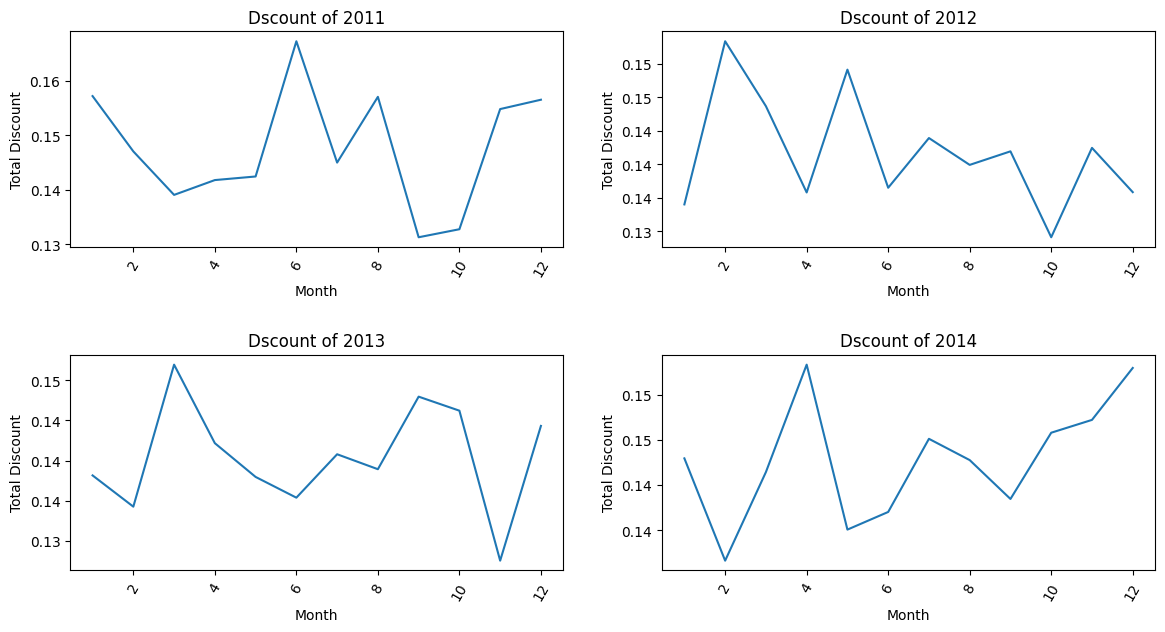

In [ ]:
# relation between each year and discount:

a=data.groupby(["order year","order_month"])["Discount"].mean()
b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Discount","Ratio"]


plt.figure(figsize=(14,7))
for i in range(2011,2015):
    plt.subplot(2,2,i-2010)
    plt.subplots_adjust(hspace = 0.5)
    sns.lineplot(data=c.loc[i],x=c.loc[i].index.get_level_values(0),y="Discount")
    plt.xticks(rotation=60)
    # changing y axis to thousands and $ sign
    fmt = '{x:,.2f}'
    tick = mtick.StrMethodFormatter(fmt)
    plt.gca().yaxis.set_major_formatter(tick)
    plt.xlabel("Month")
    plt.ylabel("Total Discount")
    plt.title("Dscount of {}".format(i))

plt.show()

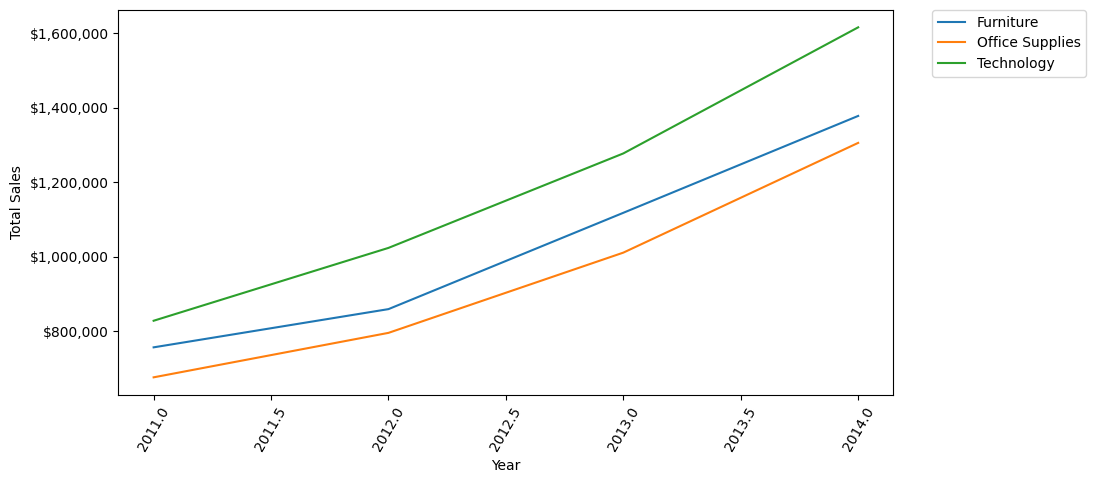

Sales  Ratio
order year Category                          
2011       Furniture         756192.38  33.47
           Office Supplies   675606.45  29.90
           Technology        827652.06  36.63
2012       Furniture         858902.56  32.08
           Office Supplies   795094.63  29.70
           Technology       1023441.51  38.22
2013       Furniture        1117723.55  32.82
           Office Supplies  1010717.64  29.68
           Technology       1277305.25  37.50
2014       Furniture        1378055.69  32.05
           Office Supplies  1305651.51  30.36
           Technology       1616158.67  37.59

In [ ]:
# relation between category and sales:

from matplotlib import ticker as mtick

a=(data.groupby(["order year","Category"])["Sales"].sum()).round(2)
a=pd.DataFrame(a)
b=(100*a/a.groupby(level=0).sum()).round(2)
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]


plt.figure(figsize=(10,5))
sns.lineplot(data=c,x=c.index.get_level_values(0),y="Sales",hue="Category")
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# changing y axis to thousands
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

c


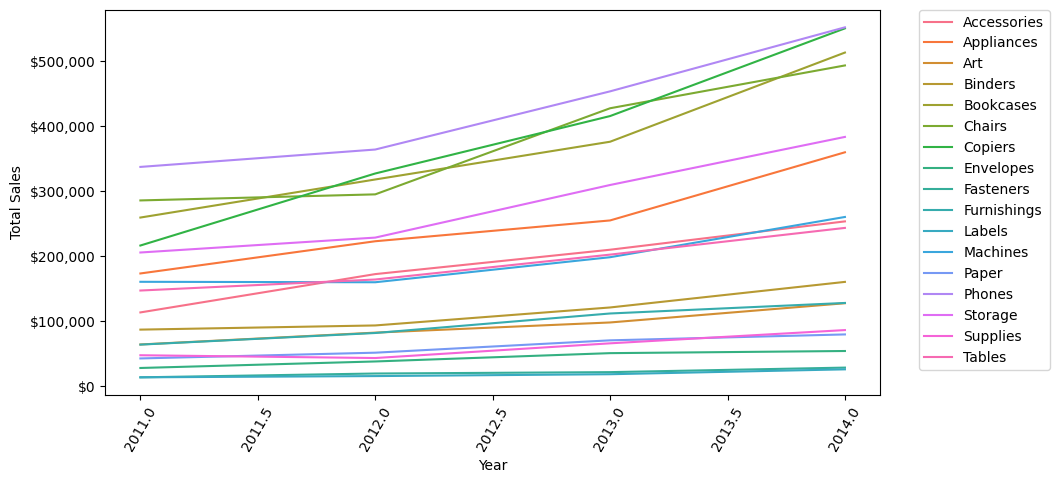

Sales  Ratio
order year Sub-Category                  
2011       Accessories   113456.01   5.02
           Appliances    173383.43   7.67
           Art            64138.93   2.84
           Binders        86998.91   3.85
           Bookcases     259396.29  11.48
...                            ...    ...
2014       Paper          79600.81   1.85
           Phones        552006.38  12.84
           Storage       383427.29   8.92
           Supplies       86283.09   2.01
           Tables        243460.40   5.66

[68 rows x 2 columns]

In [ ]:
# relation between Sub-Category and sales:

from matplotlib import ticker as mtick

a=(data.groupby(["order year","Sub-Category"])["Sales"].sum()).round(2)
a=pd.DataFrame(a)
b=(100*a/a.groupby(level=0).sum()).round(2)
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]


plt.figure(figsize=(10,5))
sns.lineplot(data=c,x=c.index.get_level_values(0),y="Sales",hue="Sub-Category")
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# changing y axis to thousands
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

c
